<a href="https://colab.research.google.com/github/moridin04/CCDEPLRL_EXERCISES_COM222ML/blob/main/Exercise6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 6

In [1]:
import tensorflow as tf

In [2]:
import numpy as np
import pandas as pd

path = "https://github.com/robitussin/CCDEPLRL_EXERCISES/blob/9b8ac1c5683abecc144f0af47eb7cda0688e12b7/dataset/reviews.json?raw=true"

dataset = pd.read_json(path)

In [3]:
dataset.head(20)

,review,rating
0,sir okay armygreen shorts nice,5
1,di pareha yong mga size nila may sobrang liit ...,5
2,super worth it ang ganda Sombra grabi order na...,5
3,ganda po salamat,5
4,maayos pagkadeliver maganda den sya,5
5,ang gnda nang short nagustohan nang binigyan k...,4
6,maganda sya medyo manipis nga lang ..,4
7,,4
8,,4
9,"manipis pla at ska dami himulmol ng sinulid, d...",2


In [4]:
dataset.shape

(1001, 2)

In [5]:
review = dataset['review'].tolist()
rating = dataset['rating'].tolist()

In [6]:
# Convert ratings to binary (Positive = 1, Negative = 0)
rating = [1 if r >= 3 else 0 for r in dataset['rating']]

In [7]:
training_size = int(len(review) * 0.8)

training_sentences = review[0:training_size]
testing_sentences = review[training_size:]
training_labels = rating[0:training_size]
testing_labels = rating[training_size:]

training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

## 1. Tokenize the data

In [8]:
vocab_size = 3132
embedding_dim = 100
max_length = 300
trunc_type='post'
padding_type='post'
oov_tok = ""

## 2. Sequence the data

In [9]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

## 3. Pad the data

In [10]:
training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

## 4. Train a sentiment model

In [11]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [12]:
num_epochs = 30
history = model.fit(training_padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Epoch 1/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 73ms/step - accuracy: 0.6932 - loss: 0.6542 - val_accuracy: 0.3234 - val_loss: 0.8132
Epoch 2/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - accuracy: 0.6907 - loss: 0.6094 - val_accuracy: 0.3234 - val_loss: 0.8206
Epoch 3/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.8064 - loss: 0.3963 - val_accuracy: 0.5871 - val_loss: 1.2343
Epoch 4/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.9151 - loss: 0.2402 - val_accuracy: 0.7512 - val_loss: 0.6672
Epoch 5/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.9557 - loss: 0.1258 - val_accuracy: 0.5721 - val_loss: 1.4535
Epoch 6/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.9801 - loss: 0.0625 - val_accuracy: 0.5821 - val_loss: 1.8555
Epoch 7/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.9847 - loss: 0.0492 - val_accuracy: 0.6517 - val_loss: 1.6555
Epoch 8/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.9784 - loss: 0.0830 - val_accuracy: 0.6119 - 

In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (32, 300, 100)         │       313,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (32, 300, 128)         │        84,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (32, 64)               │        41,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (32, 64)               │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (32, 64)               │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (32, 1)                │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,329,365 (5.07 MB)

 Trainable params: 443,121 (1.69 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 886,244 (3.38 MB)

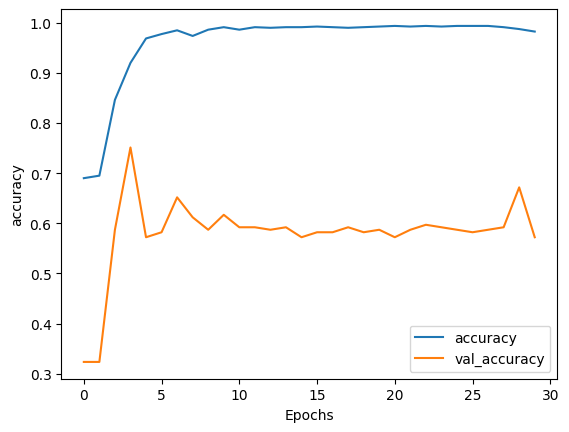

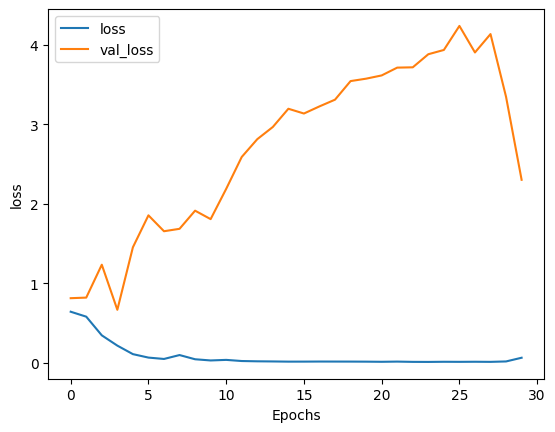

In [14]:

import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

## Get files for visualing the network

In [15]:
# First get the weights of the embedding layer
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(3132, 100)


In [16]:
import io

# Create the reverse word index
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# Write out the embedding vectors and metadata
out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [17]:
# Download the files
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## 5. Predict sentiment with new reviews

In [21]:
fake_reviews = ['parang tanga yung seller', 'GandaGanda GandagandaGandaGand', 'I hate this place', 'I LOVE THIS', 'tangina', 'best place on earth']

print(fake_reviews)

padding_type='post'
sample_sequences = tokenizer.texts_to_sequences(fake_reviews)
fakes_padded = pad_sequences(sample_sequences, padding=padding_type, maxlen=max_length)

classes = model.predict(fakes_padded)

# The closer the class is to 1, the more positive the review is deemed to be
for x in range(len(fake_reviews)):
  print(fake_reviews[x])
  print(classes[x])
  print('\n')

['parang tanga yung seller', 'GandaGanda GandagandaGandaGand', 'I hate this place', 'I LOVE THIS', 'tangina', 'best place on earth']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
parang tanga yung seller
[0.05104139]


GandaGanda GandagandaGandaGand
[0.8807728]


I hate this place
[0.7780389]


I LOVE THIS
[0.9936207]


tangina
[0.5830163]


best place on earth
[0.99882466]


